# Progetto di Data and Web mining

Matteo Spanio, A.A. 2021/2022

# Predizione sulla media

Alla luce dell'indagine condotta sui dati cerchiamo di stabilire un punto di riferimento su cui basare le predizioni dei vari modelli.

## Media generale

In particolare, si vede che la distribuzione dei `logerror` è fortemente centrata sulla media, si può allora pensare di utilizzare la media come predittore.

In [27]:
import Zillow.data as zd
from Zillow.transform import ZillowTransformer

# we don't use splitted train and validation sets since we don't have to tune the mean
df_train = zd.get_train_and_validation_dataset()
df_test = zd.get_test_dataset()

preprocessor = ZillowTransformer()
preprocessor.fit(df_train)

df_train = preprocessor.transform(df_train)
df_test = preprocessor.transform(df_test)

In [36]:
from Zillow.models import BaseModel
from Zillow.metrics import print_measure

X, y = zd.split_x_y(df_train)
X_test, y_test = zd.split_x_y(df_test)

model = BaseModel()

model.fit(X, y)

print_measure(y_true=y_test, y_pred=model.predict(X_test))

Mean absolute error: 0.06998
 Mean squared error: 0.02862
           R2 score: -0.00010


## Media per contea

Da un'ulteriore analisi si nota però c'è una notevole differenza nella varianza del logerror tra contee

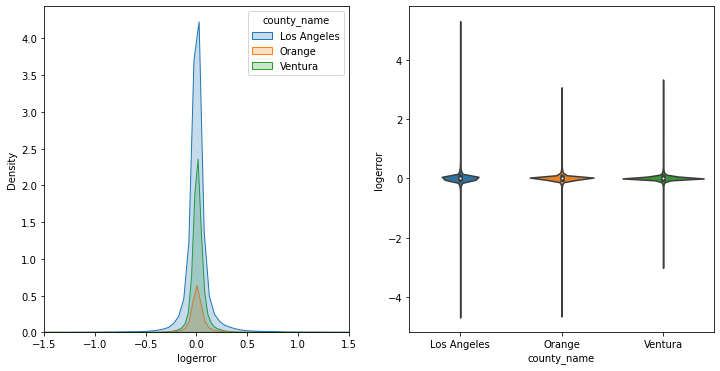

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

sns.kdeplot(data=df_train, x='logerror', hue='county_name', fill=True, ax=ax1)
ax1.set_xlim(-1.5, 1.5)
sns.violinplot(x='county_name', y='logerror', data=df_train, ax=ax2);

A questo punto vediamo se la media delle previsioni per media di ogni contea migliora il risultato ottenuto

In [30]:
from Zillow.types import Features as ft, MoreFeatures as mft

df_orange = df_train[df_train[mft.county_name.value] == 'Orange']
df_orange_test = df_test[df_test[mft.county_name.value] == 'Orange']
df_ventura = df_train[df_train[mft.county_name.value] == 'Ventura']
df_ventura_test = df_test[df_test[mft.county_name.value] == 'Orange']
df_la = df_train[df_train[mft.county_name.value] == 'Los Angeles']
df_la_test = df_test[df_test[mft.county_name.value] == 'Orange']

county_mae = []
county_mse = []
county_r2 = []

In [31]:
from Zillow.metrics import measure_model
X, y = zd.split_x_y(df_orange)
X_test, y_test = zd.split_x_y(df_orange_test)

model = BaseModel()

model.fit(X, y)

print('Orange logerror mean')
print_measure(y_true=y_test, y_pred=model.predict(X_test))
score = measure_model(y_true=y_test, y_pred=model.predict(X_test))
county_mae.append(score[0])
county_mse.append(score[1])
county_r2.append(score[2])

Orange logerror mean
Mean absolute error: 0.06241
 Mean squared error: 0.02410
           R2 score: -0.00110


In [32]:
X, y = zd.split_x_y(df_ventura)
X_test, y_test = zd.split_x_y(df_ventura_test)

model = BaseModel()

model.fit(X, y)

print('Ventura logerror mean')
print_measure(y_true=y_test, y_pred=model.predict(X_test))
score = measure_model(y_true=y_test, y_pred=model.predict(X_test))
county_mae.append(score[0])
county_mse.append(score[1])
county_r2.append(score[2])

Ventura logerror mean
Mean absolute error: 0.06232
 Mean squared error: 0.02410
           R2 score: -0.00136


In [33]:
X, y = zd.split_x_y(df_la)
X_test, y_test = zd.split_x_y(df_la_test)

model = BaseModel()

model.fit(X, y)

print('LA logerror mean')
print_measure(y_true=y_test, y_pred=model.predict(X_test))
score = measure_model(y_true=y_test, y_pred=model.predict(X_test))
county_mae.append(score[0])
county_mse.append(score[1])
county_r2.append(score[2])

LA logerror mean
Mean absolute error: 0.06205
 Mean squared error: 0.02413
           R2 score: -0.00267


In [34]:
import numpy as np
print(f'overall mean by county:')
print(f'mae: {np.mean(county_mae):.5f}')
print(f'mse: {np.mean(county_mse):.5f}')
print(f' r2: {np.mean(county_r2):.5f}')

overall mean by county:
mae: 0.06226
mse: 0.02411
 r2: -0.00171


La media delle previsioni per contea basata sulla media è migliore rispetto a quella generale.